In [3]:
import pmdarima as pm
import pandas as pd
import yfinance as yf

# Load the data (we only need the 'Close' price for a simple ARIMA)
ticker = "GOOGL" # Use the same stock as your other models
start_date = "2020-01-01"
end_date = "2025-09-05" # Use the same end date
price_data = yf.download(ticker, start=start_date, end=end_date)['Close']

# Split the data in the same way
split_ratio = 0.8
split_index = int(len(price_data) * split_ratio)
train_data = price_data[:split_index]
test_data = price_data[split_index:]

# Use auto_arima to find the best model and train it
print("Fitting auto_arima model... This may take a few minutes.")
model_arima = pm.auto_arima(train_data,
                            start_p=1, start_q=1,
                            test='adf',       # use adftest to find optimal 'd'
                            max_p=3, max_q=3, # maximum p and q
                            m=1,              # frequency of series
                            d=None,           # let model determine 'd'
                            seasonal=False,   # No seasonality
                            start_P=0,
                            D=0,
                            trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)

print(model_arima.summary())

# Make predictions on the test set
predictions_arima = model_arima.predict(n_periods=len(test_data))

C:\Users\vasam\AppData\Local\Temp\ipykernel_39020\3956967996.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  price_data = yf.download(ticker, start=start_date, end=end_date)['Close']
[*********************100%***********************]  1 of 1 completed
c:\Users\vasam\stock-prediction-project\env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\vasam\stock-prediction-project\env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\vasam\stock-prediction-project\env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\vasam\stock-prediction-project\env\lib\site-packag

Fitting auto_arima model... This may take a few minutes.
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5049.371, Time=0.18 sec


c:\Users\vasam\stock-prediction-project\env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\vasam\stock-prediction-project\env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\vasam\stock-prediction-project\env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\vasam\stock-prediction-project\env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5052.617, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5049.669, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5049.577, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5053.079, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5050.773, Time=0.24 sec


c:\Users\vasam\stock-prediction-project\env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5050.824, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5051.465, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5051.588, Time=0.06 sec


c:\Users\vasam\stock-prediction-project\env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\vasam\stock-prediction-project\env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\vasam\stock-prediction-project\env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5052.118, Time=0.45 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5050.960, Time=0.07 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 1.474 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1140
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2520.685
Date:                Fri, 05 Sep 2025   AIC                           5049.371
Time:                        18:36:37   BIC                           5069.522
Sample:                             0   HQIC                          5056.981
                               - 1140                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
i

c:\Users\vasam\stock-prediction-project\env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\vasam\stock-prediction-project\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vasam\stock-prediction-project\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\vasam\stock-prediction-project\env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Fitting auto_arima model on raw values...
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5049.371, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5052.617, Time=0.01 sec


c:\Users\vasam\stock-prediction-project\env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\vasam\stock-prediction-project\env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\vasam\stock-prediction-project\env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\vasam\stock-prediction-project\env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\vasam\stock-prediction-project\env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' wa

 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5049.669, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5049.577, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5053.079, Time=0.01 sec


c:\Users\vasam\stock-prediction-project\env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\vasam\stock-prediction-project\env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\vasam\stock-prediction-project\env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5050.773, Time=0.24 sec


c:\Users\vasam\stock-prediction-project\env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5050.824, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5051.465, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5051.588, Time=0.06 sec


c:\Users\vasam\stock-prediction-project\env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\vasam\stock-prediction-project\env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\vasam\stock-prediction-project\env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5052.118, Time=0.46 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5050.960, Time=0.08 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 1.450 seconds

--- Model Summary ---
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1140
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2520.685
Date:                Fri, 05 Sep 2025   AIC                           5049.371
Time:                        18:36:42   BIC                           5069.522
Sample:                             0   HQIC                          5056.981
                               - 1140                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

c:\Users\vasam\stock-prediction-project\env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\vasam\stock-prediction-project\env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


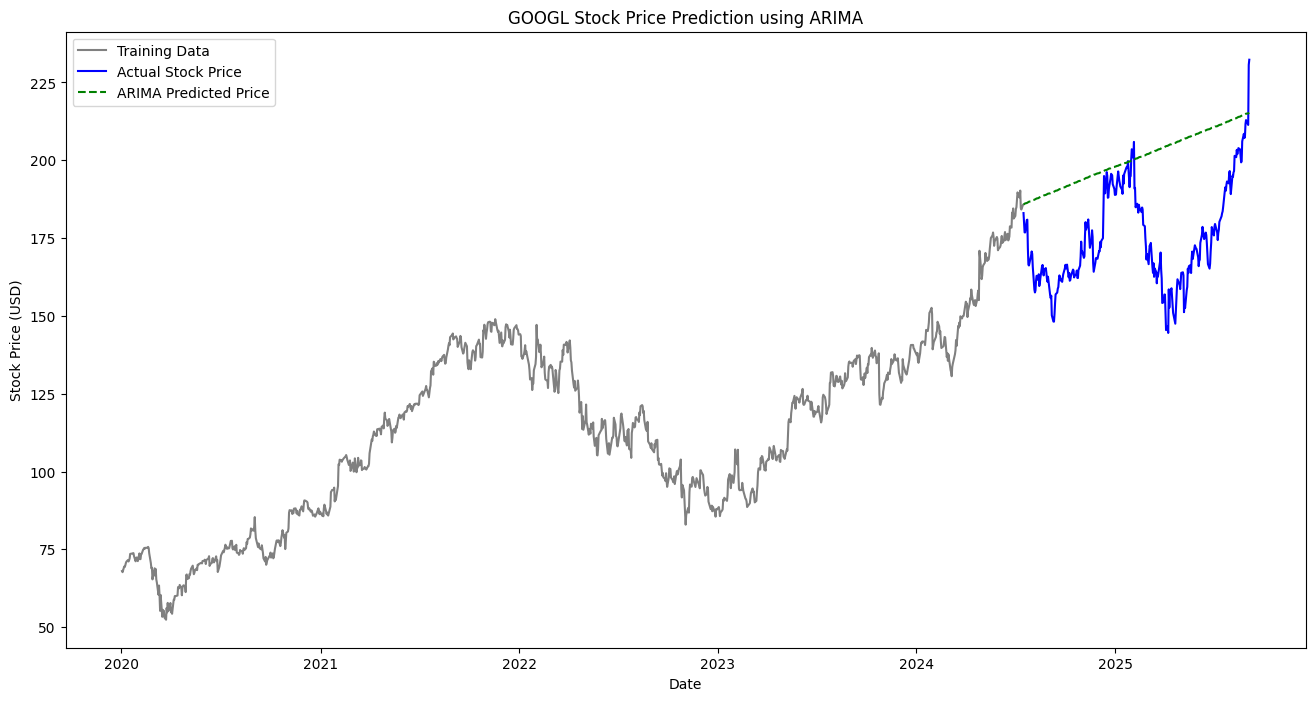

In [4]:
import pmdarima as pm
import matplotlib.pyplot as plt
import pandas as pd

# --- Final ARIMA Cell (with .values fix) ---

# --- Fit the model on the raw numpy array to avoid index issues ---
print("Fitting auto_arima model on raw values...")

# By using train_data.values, we give the model just the numbers, stripping the problematic date index.
model_arima = pm.auto_arima(train_data.values, 
                            start_p=1, start_q=1,
                            test='adf', max_p=3, max_q=3, m=1,
                            d=None, seasonal=False, start_P=0, D=0,
                            trace=True, error_action='ignore',
                            suppress_warnings=True, stepwise=True)

print("\n--- Model Summary ---")
print(model_arima.summary())

# --- Make Predictions ---
print("\nMaking predictions...")
# The model will predict a simple array of numbers
predictions_array = model_arima.predict(n_periods=len(test_data))

# Now, we create a pandas Series from our number predictions and attach the correct dates from our test_data index.
predictions_arima = pd.Series(predictions_array, index=test_data.index)

# --- Plotting ---
print("Plotting results...")
plt.figure(figsize=(16, 8))
plt.plot(train_data, color='gray', label='Training Data')
plt.plot(test_data, color='blue', label='Actual Stock Price')
plt.plot(predictions_arima, color='green', linestyle='--', label='ARIMA Predicted Price')
plt.title(f'{ticker} Stock Price Prediction using ARIMA')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

In [7]:
# Create and save the DataFrame WITH the date index
pd.DataFrame({
    'Actual': test_data.values.flatten(), 
    'Predicted_ARIMA': predictions_arima.values.flatten()
}, index=test_data.index).to_csv('predictions_arima.csv', index=True, index_label='Date')

print("SUCCESS: ARIMA predictions saved with date index.")

SUCCESS: ARIMA predictions saved with date index.
